# 图像特效-老照片滤镜

In [25]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [26]:
src = cv2.imread('../datas/face2.jpg')
gray = cv2.imread('../datas/face2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
mask = cv2.imread('../datas/old-mask.jpg')
mask_gray = cv2.imread('../datas/old-mask.jpg',0)
mask_rgb = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)

In [27]:
def smooth_light_rgb(img,mixPixel):
    basePixel = np.float32(img)
    res = np.zeros_like(basePixel)
    if mixPixel[0] < 128:
        res[:,:,0] = ((basePixel[:,:,0] + (mixPixel[0] + mixPixel[0] - 255.0) * ((np.sqrt(basePixel[:,:,0] / 255.0)) * 255.0 - basePixel[:,:,0]) / 255.0)) 
    else:
        res[:,:,0] = ((basePixel[:,:,0] + (mixPixel[0] + mixPixel[0] - 255.0) * (basePixel[:,:,0] - basePixel[:,:,0] * basePixel[:,:,0] / 255.0) / 255.0))
        
    if mixPixel[1] < 128:
        res[:,:,1] = ((basePixel[:,:,1] + (mixPixel[1] + mixPixel[1] - 255.0) * ((np.sqrt(basePixel[:,:,1] / 255.0)) * 255.0 - basePixel[:,:,1]) / 255.0)) 
    else:
        res[:,:,1] = ((basePixel[:,:,1] + (mixPixel[1] + mixPixel[1] - 255.0) * (basePixel[:,:,1] - basePixel[:,:,1] * basePixel[:,:,1] / 255.0) / 255.0))
        
    if mixPixel[2] < 128:
        res[:,:,2] = ((basePixel[:,:,2] + (mixPixel[2] + mixPixel[2] - 255.0) * ((np.sqrt(basePixel[:,:,2] / 255.0)) * 255.0 - basePixel[:,:,2]) / 255.0)) 
    else:
        res[:,:,2] = ((basePixel[:,:,2] + (mixPixel[2] + mixPixel[2] - 255.0) * (basePixel[:,:,2] - basePixel[:,:,2] * basePixel[:,:,2] / 255.0) / 255.0))
        
    res = np.clip(res,0,255)
    return np.uint8(res)

def smooth_light_pixel(img,mixPixel):
    basePixel = np.float32(img)
    res = np.zeros_like(basePixel)
    if mixPixel[0] < 128:
        res[0] = ((basePixel[0] + (mixPixel[0] + mixPixel[0] - 255.0) * ((np.sqrt(basePixel[0] / 255.0)) * 255.0 - basePixel[0]) / 255.0)) 
    else:
        res[0] = ((basePixel[0] + (mixPixel[0] + mixPixel[0] - 255.0) * (basePixel[0] - basePixel[0] * basePixel[0] / 255.0) / 255.0))
        
    if mixPixel[1] < 128:
        res[1] = ((basePixel[1] + (mixPixel[1] + mixPixel[1] - 255.0) * ((np.sqrt(basePixel[1] / 255.0)) * 255.0 - basePixel[1]) / 255.0)) 
    else:
        res[1] = ((basePixel[1] + (mixPixel[1] + mixPixel[1] - 255.0) * (basePixel[1] - basePixel[1] * basePixel[1] / 255.0) / 255.0))
        
    if mixPixel[2] < 128:
        res[2] = ((basePixel[2] + (mixPixel[2] + mixPixel[2] - 255.0) * ((np.sqrt(basePixel[2] / 255.0)) * 255.0 - basePixel[2]) / 255.0)) 
    else:
        res[2] = ((basePixel[2] + (mixPixel[2] + mixPixel[2] - 255.0) * (basePixel[2] - basePixel[2] * basePixel[2] / 255.0) / 255.0))
        
    res = np.clip(res,0,255)
    return list(np.uint8(res))

In [51]:
def nostalgla_filter(src,mask):
    rows,cols = src.shape[0],src.shape[1]
    maskf = np.float32(cv2.cvtColor(np.resize(mask,(rows,cols)),cv2.COLOR_GRAY2RGB))
    
#     print(maskf)
    srcf = np.float32(src)
    gray = cv2.cvtColor(cv2.cvtColor(src,cv2.COLOR_RGB2GRAY),cv2.COLOR_GRAY2RGB).astype(np.float32)
    dst = np.zeros_like(srcf)
    mixcolor = (200,130,10)
    grays = smooth_light_rgb(gray,mixcolor)
    for i in range(rows):
        for j in range(cols):
#             print(grays[i,j])
            dst[i,j] = smooth_light_pixel(grays[i,j],maskf[i,j])
#     grays = np.uint8(grays)
#     maskf = np.uint8(maskf)
#     dst = cv2.bitwise_and(maskf,maskf)
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

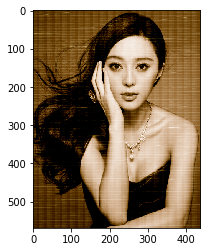

In [52]:
dst = nostalgla_filter(rgb,mask_rgb)
plt.imshow(dst)

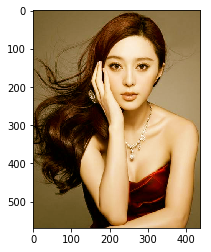

In [53]:
dst = smooth_light_rgb(rgb,(200,130,10))
plt.imshow(dst)